# **3. Óra - Derivált számítás, numerikus integrálás, rezgőrendszer szimulációja**

## **1. Differencia számítás**

**Definició (Derivált függvény)**:

Legyen $ f: \mathbb{R} \to \mathbb{R} $ egy függvény és $ x_0 \in \mathbb{R} $ egy pont az értelmezési tartományában.  
Az $ f(x) $ függvény deriváltja az $ x_0 $ pontban a következő határértékkel van definiálva:

$$
f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}
$$

ha ez a határérték létezik. Ha a fenti határérték minden $ x $-re létezik az értelmezési tartomány egy részhalmazán, akkor az $ f $ függvény differenciálható ezen a halmazon.

**Definició (Deriválás diszkrét időben)**:

Legyen $ x[n] $ egy diszkrét időben definiált jel, és legyen $ \Delta t $ a mintavételezési idő. A diszkrét időbeli derivált vagy különbségi hányados a következőképpen definiálható:

$$
x'[n] = \frac{x[n] - x[n-1]}{\Delta t}
$$




### **Feladat:** 

Egy autónak a pozició adatai a `position_data` tömbben taláhatóak meg, számoljuk ki és ábrázoljuk az autó sebességét és gyorsulását. (Az adatokat véletlenszerűen hozzuk létre.)


In [ ]:
!pip install numpy
!pip install matplotlib

*Hozzuk létre az adatokat:*

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Szimuláció adatainak előállítása
time_step = 0.1  # másodpercekben
total_time = 10  # másodpercekben
num_steps = int(total_time / time_step)

np.random.seed(42) # a véletlenszám-generátor inicializálása
acceleration = np.random.uniform(0.5, 3.0, num_steps)  # m/s^2

velocity = np.zeros(num_steps) # m/s
position = np.zeros(num_steps) # m

for i in range(1, num_steps):
    velocity[i] = velocity[i-1] + acceleration[i-1] * time_step
    position[i] = position[i-1] + velocity[i-1] * time_step

position_data = list(float(position) for position in position)

*Hozzuk létre a függvényt a sebesség számítására:*

In [41]:
def deriv(function, time_step):
    derivative = []
    for i in range(1, len(function)):
        derivative.append((function[i] - function[i-1]) / time_step)
    return derivative

*Számoljuk ki a megfelelő függvényeket:*

In [42]:
speed = deriv(position_data, time_step) 
acceleration = deriv(speed, time_step)

*Ábrázoljuk a derivált függvényeket:*

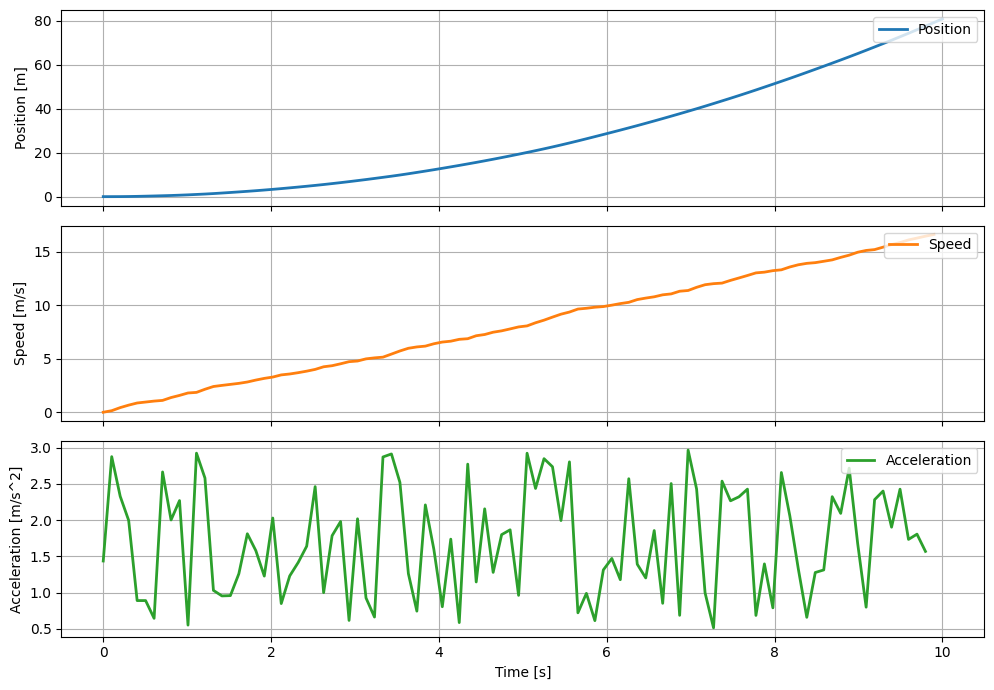

In [43]:
plt.style.use('seaborn-v0_8-muted')

fig, axs = plt.subplots(3, 1, figsize=(10, 7), sharex=True)
time_speed = time[:-1]
time_acceleration = time[:-2]

# Position data
axs[0].plot(time, position, label='Position', color='tab:blue', linewidth=2)
axs[0].set_ylabel('Position [m]')
axs[0].legend(loc='upper right')
axs[0].grid(True)

# Speed data (using sliced time array)
axs[1].plot(time_speed, speed, label='Speed', color='tab:orange', linewidth=2)
axs[1].set_ylabel('Speed [m/s]')
axs[1].legend(loc='upper right')
axs[1].grid(True)

# Acceleration data
axs[2].plot(time_acceleration, acceleration, label='Acceleration', color='tab:green', linewidth=2)
axs[2].set_ylabel('Acceleration [m/s^2]')
axs[2].set_xlabel('Time [s]')
axs[2].legend(loc='upper right')
axs[2].grid(True)

fig.tight_layout()  
plt.show()

## **2. Integrál számítás**

### **2.1. Definíció (Riemann integrál)**:

Legyen $f$ egy valós értékű függvény, amely a zárt intervallumon $[a, b]$ van definiálva, ahol $a < b$. A függvény integrálhatósága a következő módon van meghatározva.

1. **Partíció**:

Egy partíció egy sorozat, amely felosztja az intervallumot $[a, b]$ kisebb részintervallumokra. A partíció legyen:

$$
P = \{ x_0, x_1, \dots, x_n \}
$$

amelyek teljesítik a következő feltételeket:

$$
a = x_0 < x_1 < \dots < x_n = b
$$

Ezáltal az intervallum $[a, b]$ $n$ darab részintervallumra van felosztva: $[x_{i-1}, x_i]$, ahol $i = 1, 2, \dots, n$.

2. **Alsó és felső összeg**:

- **Alsó összeg**: Minden egyes részintervallumban a függvény minimális értékét választjuk, és az egyes téglalapok területeit kiszámítjuk. Az alsó összeg a következőképpen van definiálva:

$$
L(P, f) = \sum_{i=1}^{n} m_i (x_i - x_{i-1})
$$

ahol $m_i$ a $f$ függvény minimális értéke az $[x_{i-1}, x_i]$ részintervallumban.

- **Felső összeg**: Minden egyes részintervallumban a függvény maximális értékét választjuk, és az egyes téglalapok területeit kiszámítjuk. A felső összeg a következőképpen van definiálva:

$$
U(P, f) = \sum_{i=1}^{n} M_i (x_i - x_{i-1})
$$

ahol $M_i$ a $f$ függvény maximális értéke az $[x_{i-1}, x_i]$ részintervallumban.

3. **Integrálhatóság**:

A függvény $f$ **Riemann-integrálható** az $[a, b]$ intervallumon, ha minden egyes $\epsilon > 0$-ra létezik olyan partíció $P$, hogy a felső és alsó összeg közötti különbség kisebb lesz, mint $\epsilon$:

$$
U(P, f) - L(P, f) < \epsilon
$$

Ez azt jelenti, hogy ahogy a partíció finomabbá válik (azaz a részintervallumok hossza csökken), az alsó és felső összeg közötti különbség egyre kisebb lesz, és így a két összeg egyesül egy meghatározott értékre, amely a függvény Riemann-integrálja.

4. **Riemann-integrál**:

A függvény integrálja a következőképpen van definiálva:

$$
\int_a^b f(x) \, dx = \lim_{\|P\| \to 0} \sum_{i=1}^{n} f(c_i) (x_i - x_{i-1})
$$

ahol $\|P\|$ a partíció normája, amely a legnagyobb részintervallum szélességét jelenti, és $c_i$ egy tetszőleges pont minden részintervallumban. Az integrál akkor létezik, ha a Riemann-összegek (alsó és felső) határértéke megegyezik.

### **2.2. Tétel (Kvadratúra szabály)**:

A kvadratúra szabályok olyan numerikus integrációs módszerek, amelyek célja a meghatározott integrálok közelítése. A kvadratúra szabályok általában az integrál területét egy sor egyszerűbb, jól ismert alakú területtel (például trapézokkal vagy szimmetrikus pontokkal) közelítik.

A kvadratúra szabályok használatával a következő probléma megoldását célozzuk:

$$
I = \int_a^b f(x) \, dx
$$

A kvadratúra módszerek a függvényt a megadott intervallumban diszkrét minták alapján közelítik, és a közelítő integrált egy sor súlyozott összeg formájában számítják ki. A kvadratúra szabályok tehát egy adott függvényt a következő módon közelítenek:

$$
I \approx \sum_{i=1}^{n} w_i f(x_i)
$$

ahol:
- $w_i$ a súlyok,
- $x_i$ az integrálási pontok.

Egy kvadratúra szabály akkor pontos, ha a közelített integrál értéke megegyezik a pontos integrál értékével bizonyos típusú függvények esetén.

Ez a legegyszerűbb módszer a függvényt egy lépésfüggvénnyel közelíti meg (egy darabos konstans függvény, vagy egy darabolt polinom, amelynek fokszáma nulla), amely áthalad a következő ponton:




#### **2.2.1. Tétel (Kvadratúra szabályok lépésfüggvényekre alapozva)**:

Ez a legegyszerűbb módszer a függvényt egy lépésfüggvénnyel közelíti meg (egy darabos konstans függvény, vagy egy darabolt polinom, amelynek fokszáma nulla), amely áthalad a következő ponton:


$$
\left(\frac{a+b}{2}, f\left(\frac{a+b}{2}\right)\right)
$$

Ezt nevezik a **középponti szabálynak** vagy **téglalap szabálynak**.

A közelítő integrál:

$$
\int_a^b f(x) \, dx \approx (b - a) f\left(\frac{a+b}{2}\right).
$$

<center>
  <img src="Integration_rectangle.png" width="500" style="background-color: white;" />
</center>

In [ ]:
def rect_integral(function, time_step):
    integral = [0] 
    comulative_sum = 0
    for i in range(1, len(function)):
        comulative_sum += function[i]* time_step
        integral.append(comulative_sum)
    return integral

*Alkalmazzuk:*

Text(0, 0.5, 'Position [m]')

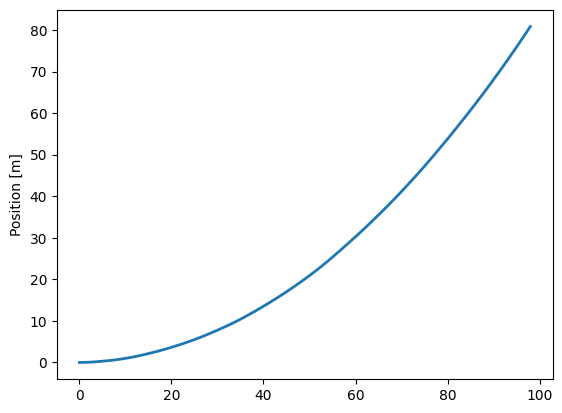

In [ ]:
position_int = rect_integral(speed, time_step)
time = range(len(position_int))
plt.plot(time, position_int, label='Position (integrated)', color='tab:blue', linewidth=2)
plt.ylabel('Position [m]')

#### **2.2.2. Tétel (Kvadratúra szabály interpolációs függvény segítségével)**

A kvadráturnak egy nagy osztálya származtatható olyan interpoláló függvények konstruktív módon történő létrehozásával, amelyek könnyen integrálhatók. Általában ezek az interpoláló függvények polinomok. A gyakorlatban, mivel a nagyon magas fokú polinomok hajlamosak erőteljesen ingadozni, csak alacsony fokú polinomokat használnak, tipikusan lineáris és kvadratikus polinomokat.

Az interpoláló függvény egy egyenes vonal lehet (affin függvény, azaz egy 1-es fokú polinom), amely áthalad az $ (a, f(a)) $ és $ (b, f(b)) $ pontokon. Ezt hívjuk **trapéz szabálynak**, amely a következőképpen van megadva:

$$
\int_a^b f(x) \, dx \approx (b - a) \left( \frac{f(a) + f(b)}{2} \right)
$$

<center>
  <img src="Integration_trapezoid.png" width="500" style="background-color: white;" />
</center>


In [59]:
def trapezoidal_integral(function, time_step):
    integral = [0]
    comulative_sum = 0
    for i in range(1, len(function)):
        comulative_sum += (function[i-1] + function[i]) / 2 * time_step
        integral.append(comulative_sum)
    return integral

*Alkalmazzuk:*

Text(0, 0.5, 'Position [m]')

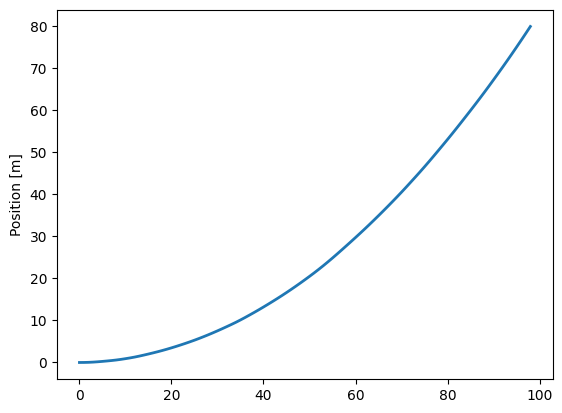

In [60]:
position_int_t = trapezoidal_integral(speed, time_step)
time = range(len(position_int_t))
plt.plot(time, position_int_t, label='Position (integrated)', color='tab:blue', linewidth=2)
plt.ylabel('Position [m]')

## **3. Példa: Rezgő rendszer szimulációja**

A **tömeg- rugó rendszer**, amely követi a Hooke-törvényt egz egyszerű példa egy rezgő rendszerre. Ennek az egyenlet a következőképpen írható fel:

$$
m \frac{d^2x}{dt^2} = -kx
$$

ahol:
- $m$ a tömeg,
- $k$ a rugóállandó,
- $x(t)$ a tömeg elmozdulása az idő függvényében.

Ahhoz, hogy az egyenlet megoldható legyen, először átírjuk elsőrendű differenciálegyenlet formájába. Bevezetjük a sebességet $v = \frac{dx}{dt}$, így a következő egyenletrendszert kapjuk:

1. $\frac{dx}{dt} = v$,
2. $m \frac{dv}{dt} = -kx$.

Most, mivel $\frac{dx}{dt} = v$, az utolsó egyenletet átalakíthatjuk $v$-vel és $x$-szel kifejezett formára:

$$
m \frac{dv}{dx} \cdot v = -kx.
$$

Ekkor az egyenlet különválaszthatóvá válik, és folytathatjuk a megoldást a két oldal integrálásával.

$$ 
   \int v \, dv = \int -\frac{k}{m} x \, dx
   $$


*Paraméteresen szimuláljunk egy ilyen rendszert:*

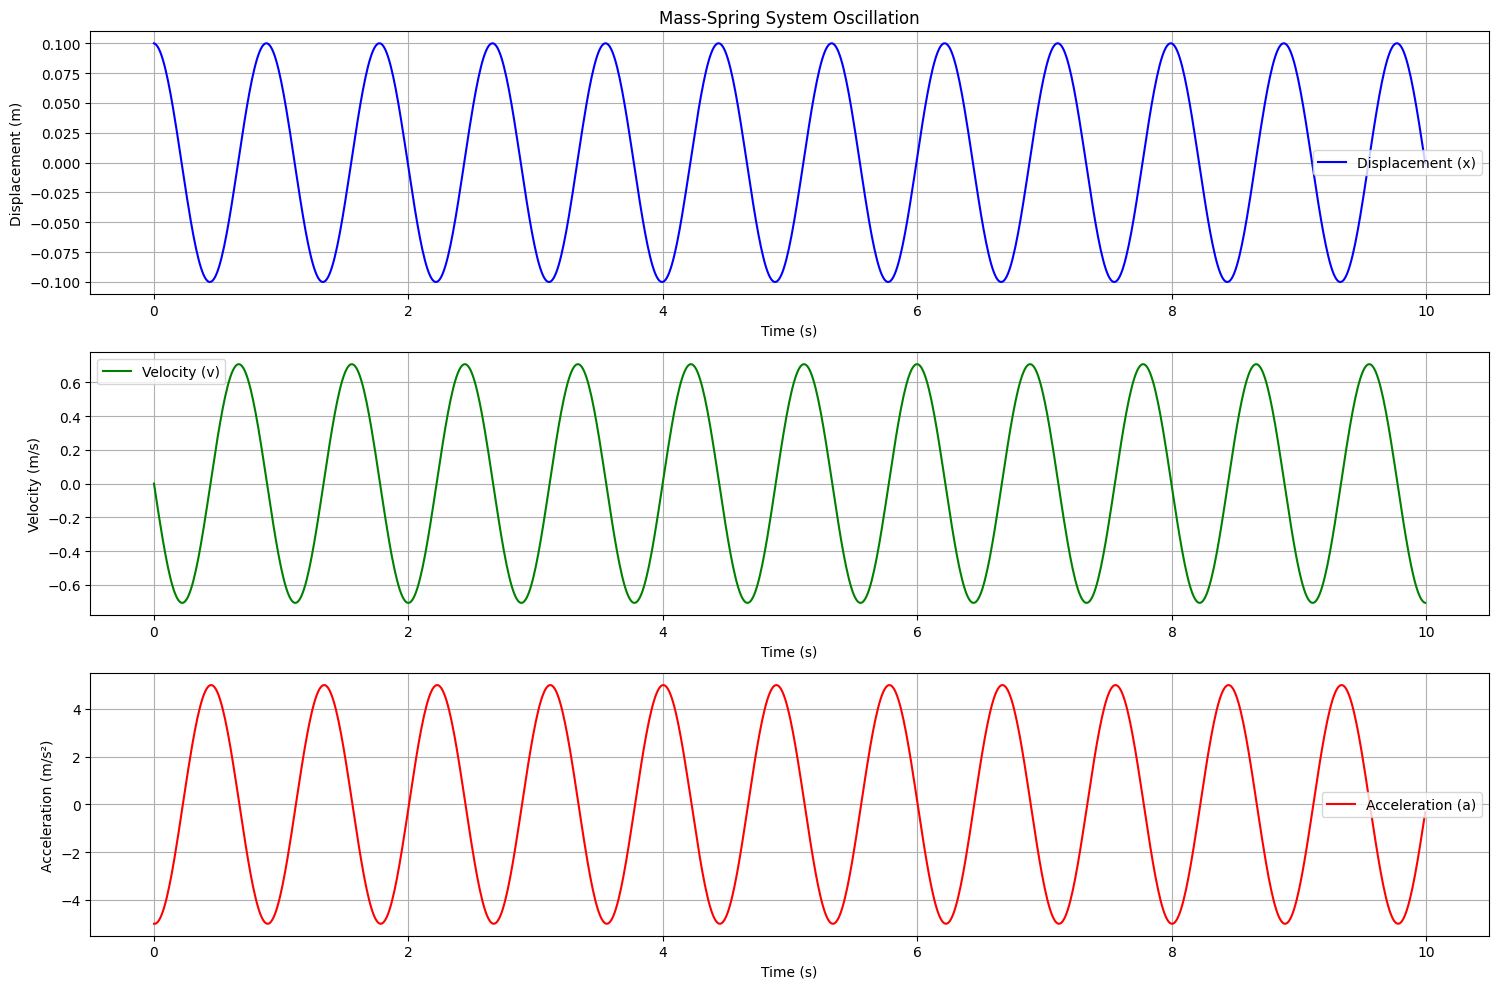

In [83]:
m = 1.0  # kg
k = 50.0  # N/m
x0 = 0.1  # m
v0 = 0.0  # m/s
t_max = 10  # s
time_step = 0.01  # s

time = np.arange(0, t_max, time_step)

x = [x0]
v = [v0]

def acceleration(x,v, m, k):
    return -k * x / m

acc = [acceleration(x0, v0, m, k)]

for t in time[1:]:
    # Szamoljuk az uj gyorsulast
    a = acceleration(x[-1], v[-1], m, k)
    acc.append(a)
    new_v = v[-1] + a * time_step
    v.append(new_v)
    
    new_x = x[-1] + v[-1] * time_step
    x.append(new_x)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(time, x, label="Displacement (x)", color='b')
plt.title("Mass-Spring System Oscillation")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, v, label="Velocity (v)", color='g')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, acc, label="Acceleration (a)", color='r')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## **4. Házi feladat: Csillapított Harmonikus Oszcillátor Modellezése**

### **4.1. Feladat leírása:**
A csillapított harmonikus oszcillátor egy olyan rendszer, ahol egy tömeg egy rugóra van rögzítve, és olyan csillapító erő hat rá, amely arányos a sebességével. A tömeg mozgása az alábbi differenciálegyenlettel írható le:

$$ m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + kx = 0 $$

ahol:

- $m$: a tömeg (kg)
- $c$: a csillapítási tényező (Ns/m)
- $k$: a rugóállandó (N/m)
- $x$: a kitérés (m)
- $\frac{dx}{dt}$: a sebesség (m/s)
- $\frac{d^2x}{dt^2}$: a gyorsulás (m/s²)

### **4.2. Feladat:**

1. Készíts egy `integral` függvényt, amely numerikusan számítja ki egy függvény integrálját.  
2. Használd ezeket a függvényeket a csillapított harmonikus oszcillátor mozgásának modellezésére az idő függvényében.  
3. Ábrázold a tömeg kitérését, sebességét és gyorsulását az idő függvényében.

#### **4.3. Paraméterek:**
- Tömeg ($m$): 1.0 kg
- Rugóállandó ($k$): 50.0 N/m
- Csillapítási tényező ($c$): 0.5 Ns/m
- Kezdeti kitérés ($x_0$): 0.1 m
- Kezdeti sebesség ($v_0$): 0.0 m/s
- Teljes idő ($t_{\text{max}}$): 100 s
- Időlépés ($\Delta t$): 0.1 s